In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import Button, HBox
from IPython.display import display, clear_output

# Global video index
video_index = 0

#video_names = [1, 2, 3, 4, 5, 6, 7, 47, 78, 79, 80, 83, 85, 100, 101, 102, 113, 114, 115, 116, 127, 129, 131, 132, 133
#                , 134, 135, 136, 137, 138, 140, 141, 142, 144, 146, 147, 148, 162, 163, 164, 165, 173, 174, 175, 176, 177, 178, 186, 187, 188, 197]

video_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 36, 37, 42, 44,
                46, 55,56,57,58,81,104,105, 107, 108, 110, 149, 150, 151, 152, 153, 155, 156, 166, 167, 168, 171, 198]

def disp_frame(video_path, video_index):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Frame counter
    frame_count = 0
    
    # Total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the buttons
    back3_button = Button(description="3 Frames Back")
    prev_button = Button(description="Previous Frame")
    next_button = Button(description="Next Frame")
    ahead3_button = Button(description="3 Frames Ahead")
    save_button = Button(description="Save Frame")  # Add this line
    next_video_button = Button(description="Next Video")  # New button
    prev_video_button = Button(description="Previous Video")  # New button
    
    def show_frame():
        # Set the current frame to the frame we want to display
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count)
        
        # Read the frame from the video
        ret, frame = cap.read()
        
        if ret == True:
            # Convert color style from BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Display the frame
            clear_output(wait=True)
            plt.imshow(frame)
            plt.axis('off')  # Turn off the axis
            plt.show()
            print(f'Displaying Video {video_names[video_index]}, Frame {frame_count + 1} of {total_frames}')
            display(HBox([back3_button, prev_button, next_button, ahead3_button, save_button, prev_video_button, next_video_button]))  
        else:
            print(f'Cannot read frame {frame_count} of {total_frames} from video {video_index}.')
            cap.release()

        return frame  # Return the frame for saving

    def on_back3_button_click(b):
        nonlocal frame_count
        frame_count = max(0, frame_count - 3)  # Do not go below 0
        show_frame()

    def on_prev_button_click(b):
        nonlocal frame_count
        frame_count = max(0, frame_count - 1)  # Do not go below 0
        show_frame()

    def on_next_button_click(b):
        nonlocal frame_count
        frame_count = min(total_frames - 1, frame_count + 1)  # Do not go beyond the total number of frames
        show_frame()

    def on_ahead3_button_click(b):
        nonlocal frame_count
        frame_count = min(total_frames - 1, frame_count + 3)  # Do not go beyond the total number of frames
        show_frame()

    def on_save_button_click(b):
        # Get the current frame
        frame_to_save = show_frame()
        
        # Convert color style back from RGB to BGR
        frame_to_save = cv2.cvtColor(frame_to_save, cv2.COLOR_RGB2BGR)

        # Specify the filename and path. 
        # Change the path when necessary!!! (cor - correct, inc - incorrect) (correctOrIncorrect_upOrDown_videoindex_frame)
        filename = f"images\wrong_seq\inc_up_{video_names[video_index]}_{frame_count + 1}.jpg"

        # Save the frame
        cv2.imwrite(filename, frame_to_save)
        print(f"Frame saved as {filename}")

    def on_next_video_button_click(b):
        global video_index
        if video_index < len(video_names) - 1:
            video_index += 1
            disp_frame(f"datasets/data_corr_incorr/Wrong sequence/Copy of push up {video_names[video_index]}.mp4", video_index)
        else:
            print("This is the last video.")

    def on_prev_video_button_click(b):
        global video_index
        if video_index > 0:
            video_index -= 1
            disp_frame(f"datasets/data_corr_incorr/Wrong sequence/Copy of push up {video_names[video_index]}.mp4", video_index)
        else:
            print("This is the first video.")
    
    back3_button.on_click(on_back3_button_click)
    prev_button.on_click(on_prev_button_click)
    next_button.on_click(on_next_button_click)
    ahead3_button.on_click(on_ahead3_button_click)
    save_button.on_click(on_save_button_click)
    next_video_button.on_click(on_next_video_button_click)
    prev_video_button.on_click(on_prev_video_button_click)
 
    
    # Display the button and start the function
    display(HBox([back3_button, prev_button, next_button, ahead3_button, save_button, prev_video_button, next_video_button]))
    show_frame()

## Select and save image

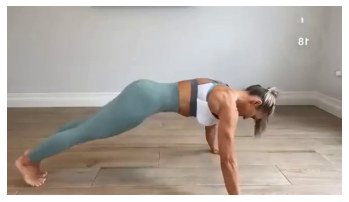

Displaying Video 1, Frame 1 of 61


In [2]:
# Disp image and buttons of correct videos
disp_frame(f"datasets/data_corr_incorr/Correct sequence/Copy of push up {video_names[video_index]}.mp4", video_index)

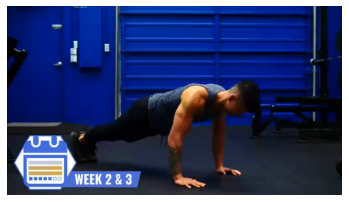

Displaying Video 198, Frame 1 of 211


Frame saved as images\wrong_seq\inc_up_198_1.jpg
This is the last video.
This is the last video.


In [ ]:
# Disp image and buttons of incorrect videos
disp_frame(f"datasets/data_corr_incorr/Wrong sequence/{video_names[video_index]}.mp4", video_index)

Agora é tomar nota da UP e DOWN frame (apenas uma de cada) para cada vídeo. Depois recriamos os novos datasets, o taylored_correct e o taylored_incorrect (com os labels corretos e incorretos, respetivamente).